In [3]:
library(CellChat)
library(ggplot2)

In [4]:
cellchat_list <- readRDS("h5ad/cellchat/individ_cellchat.RData")

In [5]:
cellchat_list

$cd40
An object of class CellChat created from a single dataset 
 22658 genes.
 34686 cells. 
CellChat analysis of single cell RNA-seq data! 

$combo
An object of class CellChat created from a single dataset 
 22658 genes.
 36079 cells. 
CellChat analysis of single cell RNA-seq data! 

$ctrl
An object of class CellChat created from a single dataset 
 22658 genes.
 27799 cells. 
CellChat analysis of single cell RNA-seq data! 

$tak
An object of class CellChat created from a single dataset 
 22658 genes.
 35554 cells. 
CellChat analysis of single cell RNA-seq data! 


In [6]:
cellchat <- mergeCellChat(cellchat_list, add.names = names(cellchat_list))

Merge the following slots: 'data.signaling','images','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



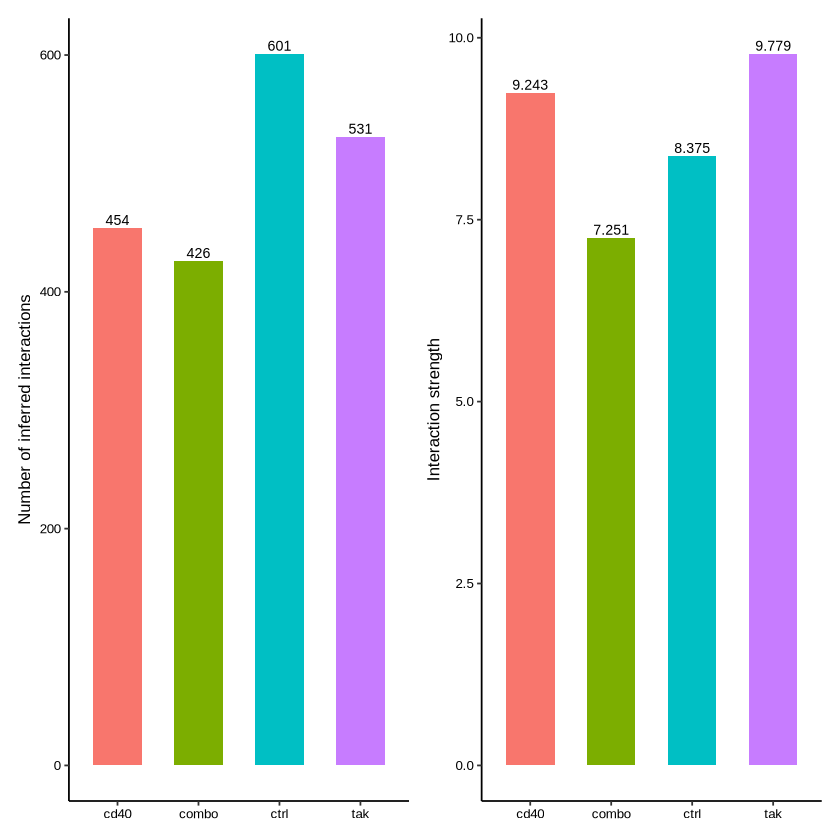

In [7]:
gg1 <- compareInteractions(cellchat, show.legend = F, group = c(1,2,3,4))
gg2 <- compareInteractions(cellchat, show.legend = F, group = c(1,2,3,4), measure = "weight")
gg1+gg2

In [8]:
comparisons = list(c(1,2), c(3,1), c(1,4), c(4,2), c(3,2), c(3,4))
names(comparisons) = list("CD40vCombo", "CtrlvCd40", "Cd40vtak", "takvcombo", "ctrlvcombo", "ctrlvtak")

In [24]:
for (x in 1:6) {
    dir=paste0("figs/cellchat/", names(comparisons[x]))
    dir.create(dir, showWarnings = FALSE)
    png(paste0(dir, "countsheatmap.png"))
    gg1 <- netVisual_heatmap(cellchat, comparison = comparisons[[x]], title.name=paste0(names(comparisons[x]), " counts"))
    ComplexHeatmap::draw(gg1, )
    dev.off()
    #> Do heatmap based on a merged object
    png(paste0(dir, "weightsheatmap.png"))
    gg1<-netVisual_heatmap(cellchat, measure = "weight", comparison = comparisons[[x]])
    ComplexHeatmap::draw(gg1)
    dev.off()
    png(paste0(dir, "counts_chordplot.png"))
    par(mfrow = c(1,1))
    netVisual_diffInteraction(cellchat, weight.scale = T, comparison = comparisons[[x]], title.name = paste0(names(comparisons[x]), " Counts"))
    dev.off()
    png(paste0(dir, "weights_chordplot.png"))
    par(mfrow = c(1,1))
    netVisual_diffInteraction(cellchat, weight.scale = T, comparison = comparisons[[x]], title.name = paste0(names(comparisons[x]), " weights"), measure="weight")
    dev.off()
    #gg1 <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = NULL, targets.use = NULL, stacked = T, do.stat = TRUE, comparison = comparisons[[x]])
    #ggsave(paste0("figs/cellchat/", names(comparisons[x]), "_infoflow.png"))
    dir.create(paste0(dir, "/senders"), showWarnings = FALSE)
    dir.create(paste0(dir, "/recievers"), showWarnings = FALSE)
    dir.create(paste0(dir, "/diff"), showWarnings = FALSE)

    for (n in c("T-Cells", "Macrophages", "NK Cells", "Epithelial", "CD103+ cDC", "Granulocytes", "Fibroblasts")){
        send = paste0(dir, "/senders/", n)
        recieve = paste0(dir, "/recievers/", n)
        png(paste0(send, "_weights_chordplot.png"))
        netVisual_diffInteraction(cellchat, weight.scale = T, comparison = comparisons[[x]], sources.use=c(n), title.name = paste0(names(comparisons[x]), n, " sender weights"), measure="weight")
        dev.off()
        png(paste0(send, "_counts_chordplot.png"))
        netVisual_diffInteraction(cellchat, weight.scale = T, comparison = comparisons[[x]], sources.use=c(n), title.name = paste0(names(comparisons[x]), n, " sender counts"), measure="count")
        dev.off()
        png(paste0(recieve, "_weights_chordplot.png"))
        netVisual_diffInteraction(cellchat, weight.scale = T, comparison = comparisons[[x]], targets.use=c(n), title.name = paste0(names(comparisons[x]), n, " reciever weights"), measure="weight")
        dev.off()
        png(paste0(recieve, "_counts_chordplot.png"))
        netVisual_diffInteraction(cellchat, weight.scale = T, comparison = comparisons[[x]], targets.use=c(n), title.name = paste0(names(comparisons[x]), n, " reciever counts"), measure="count")
        dev.off()
        }
    diff=paste0(dir, "/diff/")
    for (n in c("T-Cells", "Epithelial", "Fibroblasts", "Granulocytes", "Macrophages")){
        gg1 <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c("Macrophages"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[x]])
        ggsave(paste0(diff, "Macrophages_to_", n, "_diff_weights.png"))
        gg1 <- rankNet(cellchat, mode = "comparison", measure = "weight", sources.use = c(n), targets.use = c("Macrophages"), stacked = T, do.stat = TRUE, comparison = comparisons[[x]])
        ggsave(paste0(diff, n, "_to_Macrophages", "_diff_weights.png"))
        gg1 <- rankNet(cellchat, mode = "comparison", measure = "count", sources.use = c("Macrophages"), targets.use = c(n), stacked = T, do.stat = TRUE, comparison = comparisons[[x]])
        ggsave(paste0(diff, "Macrophages_to_", n, "_diff_counts.png"))
        gg1 <- rankNet(cellchat, mode = "comparison", measure = "count", sources.use = c(n), targets.use = c("Macrophages"), stacked = T, do.stat = TRUE, comparison = comparisons[[x]])
        ggsave(paste0(diff, n, "_to_Macrophages", "_diff_counts.png"))

    }
}

Do heatmap based on a merged object 


Do heatmap based on a merged object 


Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Do heatmap based on a merged object 


Do heatmap based on a merged object 


Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7